# Working with large data set

In this workshop, we will use real data imported from csv file (boston.csv) instead of made-up ones

In [13]:
# import everything we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('boston.csv')

In [14]:
''' 
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''

" \nVariables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's\n "

### Construct a dataframe for our data and target for a better illustration
### set the columns names according to the result above and show the first 5 rows

In [15]:
# Construct a dataframe for our data and target for a better illustration
# set the columns names according to the result above

input_df = df[['RM']]
# Alternative way below to assign the df for input_df but set index_col = 0 at the beginning, i.e. 
# df = pd.read_csv('boston.csv', index_col=0) so that it does not show the unnamed DataFrame index at col 0
# input_df = df.drop(columns=['MEDV']) 
median_value = df['MEDV'] 
median_value = df.MEDV # Alternative way to assign the df for target
input_df.head()

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147


## Model Training

In [16]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [17]:
# notice that we need double square brackets to select X
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
# default split ratio is 25% for test set
# let say we want the split ration to be 20% for test set

x_train, x_test, y_train, y_test = train_test_split(input_df,median_value, test_size=0.2, random_state = 42)

In [18]:
# We need 2D arrays for x_train 


In [19]:
# instantiate a linear regression model
# train the model to fit the training data, finding the coef and intercept

In [20]:
# import model
from sklearn.linear_model import LinearRegression

#instantiate
linReg = LinearRegression()

# fit out linear model to the train set data
linReg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediction

Now that we've trained our model, the next step is to predict the data.

Steps:

    Get predictions, 𝑦̂, using LinearRegression.predict()


In [21]:
from sklearn.metrics import r2_score

y_hat = linReg.predict(x_test) 

# Model Validation

We want to see how well our model fits the data. r2-score should be as close to 1 as possible

In [22]:
# we can see the coefficient and intercept our model finds
print("Coefficient: ",linReg.coef_)
print("Intercept: ", linReg.intercept_)
print('r2_score: ',r2_score(y_test, y_hat)) 

Coefficient:  [9.34830141]
Intercept:  -36.24631889813795
r2_score:  0.3707569232254778


As the r2-score isn't very close to 1, our linear regression model doesn't really fit the data well
We can visualize it to see what the model looks like

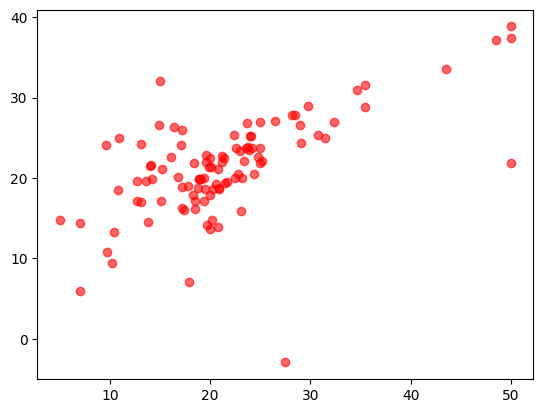

In [23]:
# import seaborn for plotting
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline
plt.scatter(y_test, y_hat, color='red', label='Actual vs. Predicted Values', alpha=0.6)

Plot the regression line (blue) vs the actual value (red)

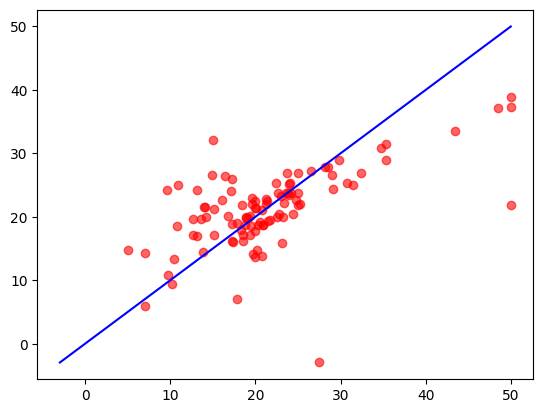

In [24]:
# We want to plot the regression line(blue) vs the actual value(red)

# Plot the ideal regression line (The perfect fit line: y = x)
# Find the min and max values to define the range of the line
min_val = min(y_test.min(), y_hat.min())
max_val = max(y_test.max(), y_hat.max())
reg_line = np.linspace(min_val, max_val, 100)

# Plot the regression line in blue
plt.plot(reg_line, reg_line, color='blue')
# Plot the actual value in red
plt.scatter(y_test, y_hat, color='red', label='Actual vs. Predicted Values', alpha=0.6)
plt.show()
